# Exploritory data analysis

# EDA is a technique used in Data science to analyze and summerize the main characteristics of a dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # we will use scripting layer to plot our data.
%matplotlib inline

In [2]:
# importing the data set.
df = pd.read_csv("C:/Users/ankit/Downloads/automobileEDA.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# since we want to make a effective model to predict the car price we need to first understand what is the charactersiticks that has most impact on it..

In [6]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

(0.0, 52920.77070997336)

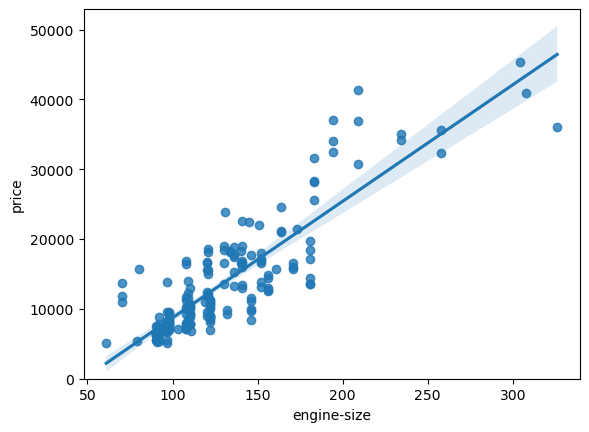

In [11]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [8]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


# from the above scatter plot with a regression line and the strong correlation between them of 87% indicates that they have strong positive relation ship. 

In [9]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

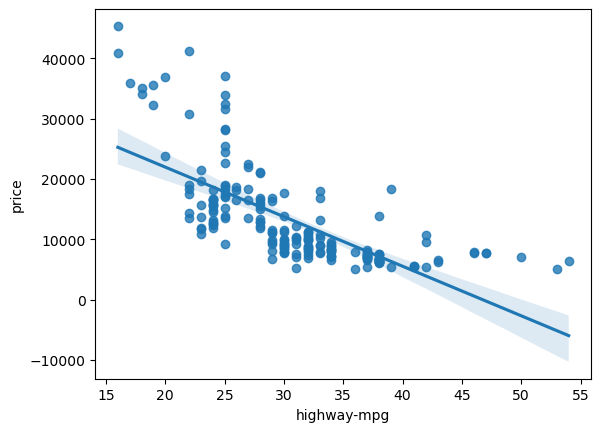

In [13]:
sns.regplot(x="highway-mpg", y="price", data=df)

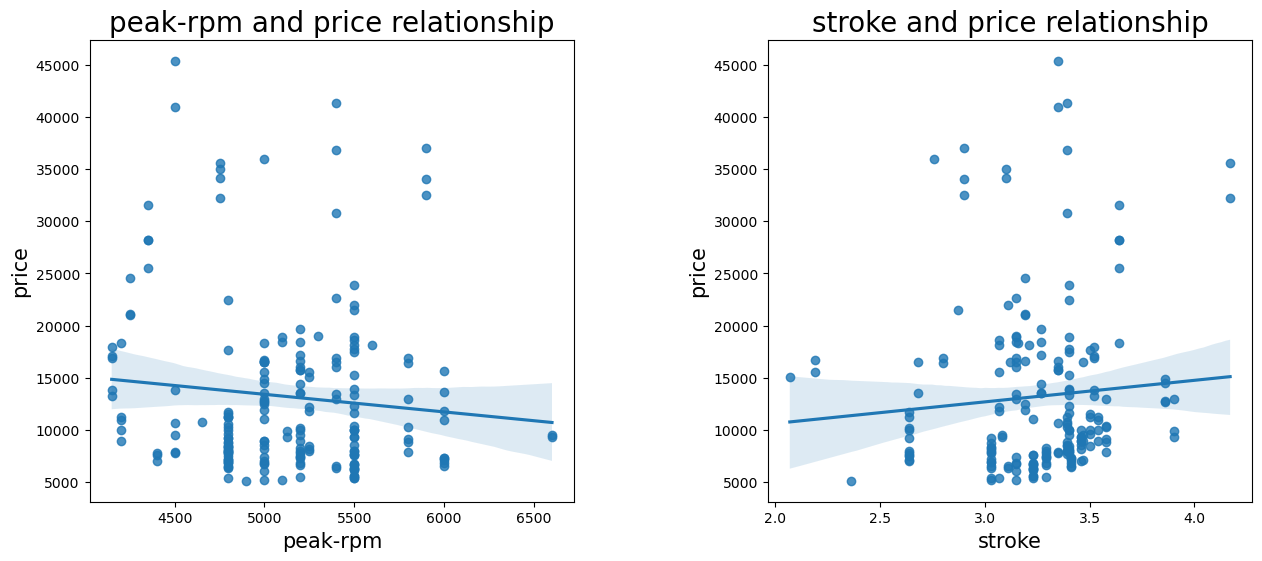

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.regplot(x="peak-rpm", y="price", data=df, ax=axs[0])
axs[0].set_title("peak-rpm and price relationship", fontsize=20)
axs[0].set_xlabel("peak-rpm", fontsize=15)
axs[0].set_ylabel("price", fontsize=15)

sns.regplot(x="stroke", y="price", data=df, ax=axs[1])
axs[1].set_title("stroke and price relationship", fontsize=20)
axs[1].set_xlabel("stroke", fontsize=15)
axs[1].set_ylabel("price", fontsize=15)

plt.subplots_adjust(wspace=0.4)

plt.show()

In [30]:
df[["stroke", "peak-rpm", "price"]].corr()

,stroke,peak-rpm,price
stroke,1.000000,-0.065713,0.082310
peak-rpm,-0.065713,1.000000,-0.101616
price,0.082310,-0.101616,1.000000


<p>from the above analysis we can easily see that the engine size and the highway-mpg has the most impact on the price of the automobiles while the engine size increses the price increses. Thus it has positive and strong linear relation ship But when the highway-mpg increses the price decreses so it has strong negetive relation ship accoding to the graph and the correlation calculated above.</p>

# That was about the continious variable but what about the categorical variable ??

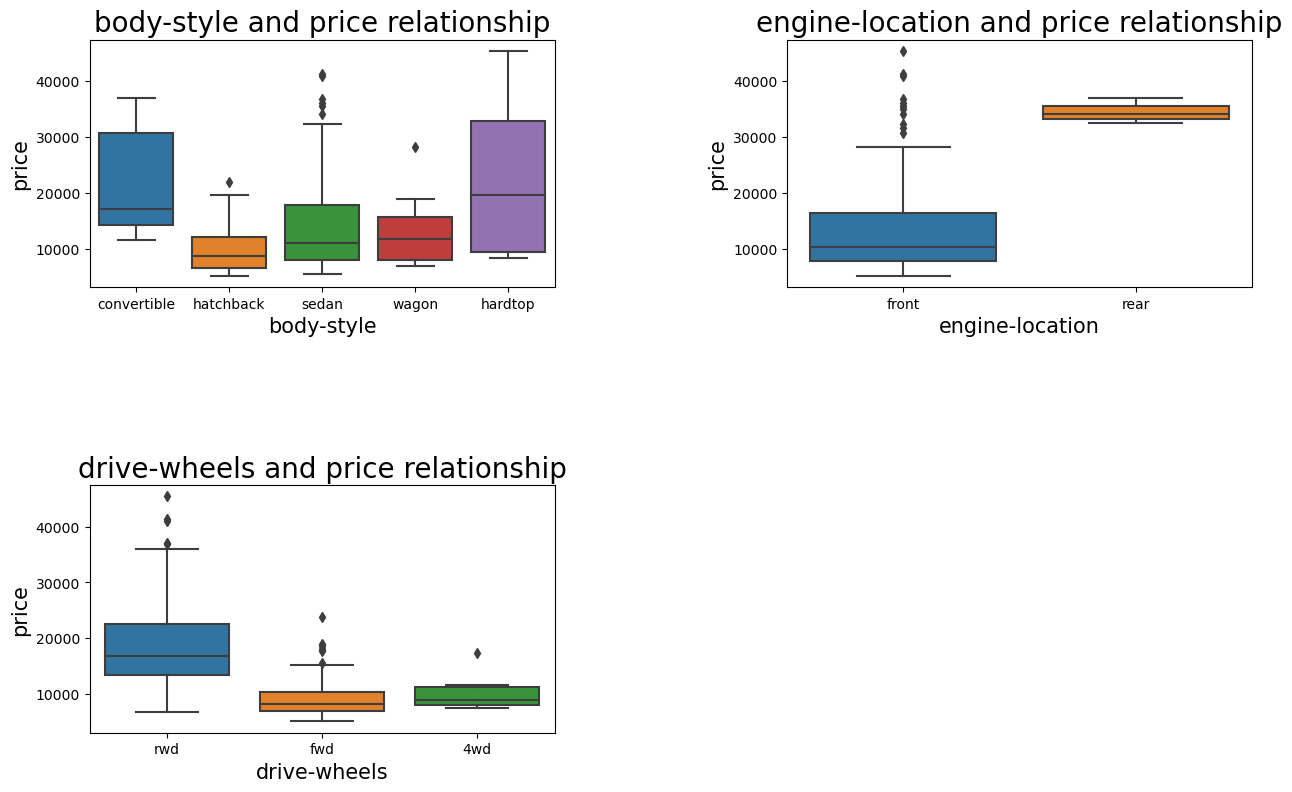

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

sns.boxplot(x="body-style", y="price", data=df, ax=axs[0, 0])
axs[0, 0].set_title("body-style and price relationship", fontsize=20)
axs[0, 0].set_xlabel("body-style", fontsize=15)
axs[0, 0].set_ylabel("price", fontsize=15)

sns.boxplot(x="engine-location", y="price", data=df, ax=axs[0, 1])
axs[0, 1].set_title("engine-location and price relationship", fontsize=20)
axs[0, 1].set_xlabel("engine-location", fontsize=15)
axs[0, 1].set_ylabel("price", fontsize=15)

sns.boxplot(x="drive-wheels", y="price", data=df, ax=axs[1, 0])
axs[1, 0].set_title("drive-wheels and price relationship", fontsize=20)
axs[1, 0].set_xlabel("drive-wheels", fontsize=15)
axs[1, 0].set_ylabel("price", fontsize=15)


plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.delaxes(axs[1,1])
plt.show()

<p>from the above observation we can clearly see that the relation between body-style and price are overlapping which doesnt show the proper estimaion of a price. on the other hand engine location and drive weels have distinct price set which doesnt much overlap between each other but relation ship of price with engine location has more outliers which is not a potential for the relation ship to be strong so the drive weels are likely to have a good relation ship with the price of a automobile.</p>

# Descriptive Statistical Analysis

In [45]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


<p>here we can see the mean, standerd deviation, q1, q2, q3,minimum and maximum value of a data set. which tells us the core mesures of dispersion spread of data over the graphs and much more like the 25% of data of a particular column and the median value of a column it helps in us to understand the data more clearly</p>

In [47]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<p>we can also calculate the Descriptive statistics of data set containing object dtype(datatype)</p>

# now lets analyze how many drive-weels cars are there

In [48]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [60]:
df_hotweels_count = df["drive-wheels"].value_counts().to_frame()
df_hotweels_count.rename(columns={"drive-wheels":"value-counts"}, inplace=True)

In [63]:
df_hotweels_count.index.name = "drive-wheels"
df_hotweels_count

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


<p>Here we can see that the front wheel drive drive(fwd) has the most car type and rare wheels and the minimum cars are 4wd.</p>

In [64]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>here from this table we can analyse majority of the automobiles hava the front engine then rear.</p>

# AND  this is how we handle and analyze and summerize some of the characteristics of a dataset or a data.